**ASESMEN TENGAH SEMESTER**

Machine Vision (MK511)

Nama  : Nilam Saswaty Manalu

NIM   : 4212201057

Kelas : Mekatronika 5B Pagi

**a.	Pemrosesan Data dari Dataset**

In [ ]:
pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
import pandas as pd

train_data = pd.DataFrame()
test_data = pd.DataFrame()

for chunk in pd.read_csv('/content/emnist-bymerge-train.csv', header=None, chunksize=10000):
    train_data = pd.concat([train_data, chunk], ignore_index=True)
    print("Processing chunk from train dataset...")

for chunk in pd.read_csv('/content/emnist-bymerge-test.csv', header=None, chunksize=10000):
    test_data = pd.concat([test_data, chunk], ignore_index=True)
    print("Processing chunk from test dataset...")

Processing chunk from train dataset...
Processing chunk from train dataset...
Processing chunk from test dataset...
Processing chunk from test dataset...


In [ ]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

max_samples = 10000
if len(X_train) > max_samples:
    X_train = X_train[:max_samples]
    y_train = y_train[:max_samples]

In [ ]:
if len(X_test) > max_samples:
    X_test = X_test[:max_samples]
    y_test = y_test[:max_samples]

**c.	Parameter yang digunakan pada HOG dan SVM**

In [ ]:
!pip install scikit-image
import numpy as np
from skimage.feature import hog

hog_features_train = []
hog_images_train = []
for i in range(X_train.shape[0]):
    image = X_train.iloc[i]
    image_data = image.to_numpy().astype(np.uint8).reshape((28, 28))
    feature, hog_img = hog(image_data,
                                 orientations=9,
                                 pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2),
                                 visualize=True,
                                 block_norm='L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)
hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

hog_features_test = []
hog_images_test = []
for i in range(X_test.shape[0]):
    image = X_test.iloc[i]
    image_data = image.to_numpy().astype(np.uint8).reshape((28, 28))
    feature, hog_img = hog(image_data,
                                 orientations=9,
                                 pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2),
                                 visualize=True,
                                 block_norm='L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)
hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

In [ ]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

**b. Metode Evaluasi LOOCV**

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Buat dan latih model
model = LogisticRegression()
model.fit(X_train, y_train)

# 2. Buat prediksi
y_pred = model.predict(X_train)

# 3. Hitung metrik evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**d.	Perolehan Hasil Metrik Evaluasi**

In [ ]:
print("\nLOOCV Results (Training Data):")
print("Confusion Matrix:")
print(loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)


LOOCV Results (Training Data):
Confusion Matrix:
[[383   0   1 ...   0   1   2]
 [  0 483   0 ...   0   1   5]
 [  0   0 495 ...   0   1   1]
 ...
 [  0   0   0 ...  16   0   0]
 [  0   1   0 ...   0 161   2]
 [  0   3   0 ...   0   0 201]]
Accuracy: 0.8613
Precision: 0.8598133311985908
Recall: 0.8613
F1 Score: 0.859437381658117


In [ ]:
def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

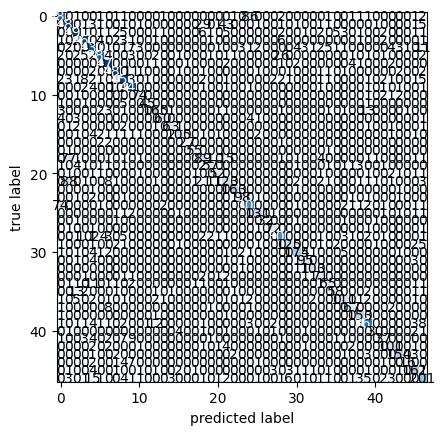

In [ ]:
plot_confusion_matrix(loo_confusion_matrix)

In [ ]:
def plot_images_with_hog(X, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    fig.suptitle(title)

    for i in range(min(len(X), 10)):
        axes[0, i].imshow(X[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

In [ ]:
def extract_hog_images(images):

    hog_images = []
    for img in images:
        fd, hog_image = hog(image.reshape((28, 28)),
                            orientations=9,
                            pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2),
                            visualize=True,
                            block_norm='L2')
        hog_images.append(hog_image)
    return np.array(hog_images)

In [ ]:
def extract_hog_images(images):

    hog_images = []
    for img in images.values:
        fd, hog_image = hog(img.reshape((28, 28)),
                            orientations=9,
                            pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2),
                            visualize=True,
                            block_norm='L2')
        hog_images.append(hog_image)
    return np.array(hog_images)

In [ ]:
hog_images_train = extract_hog_images(X_train)

In [ ]:
def plot_images_with_hog(X, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    fig.suptitle(title)

    for i in range(min(len(X), 10)):
        axes[0, i].imshow(X.iloc[i].values.reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

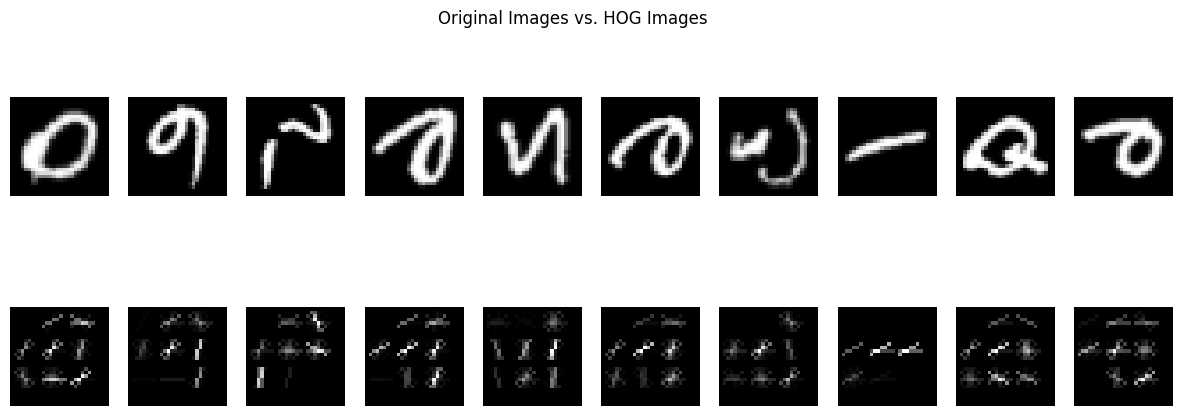

In [ ]:
plot_images_with_hog(X_train, hog_images_train, title="Original Images vs. HOG Images")